In [1]:
!pip install gdown

In [2]:
!gdown 1TeenQpv5j760s09ZKBjYwmNWBDWrazMg

Downloading...
From: https://drive.google.com/uc?id=1TeenQpv5j760s09ZKBjYwmNWBDWrazMg
To: /content/Copy of FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 12.4MB/s]


In [3]:
!unzip Copy\ of\ FruitinAmazon.zip

Archive:  Copy of FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train/

Task 1: Data understanding and visualization

Load and Visualize Images from Each Class

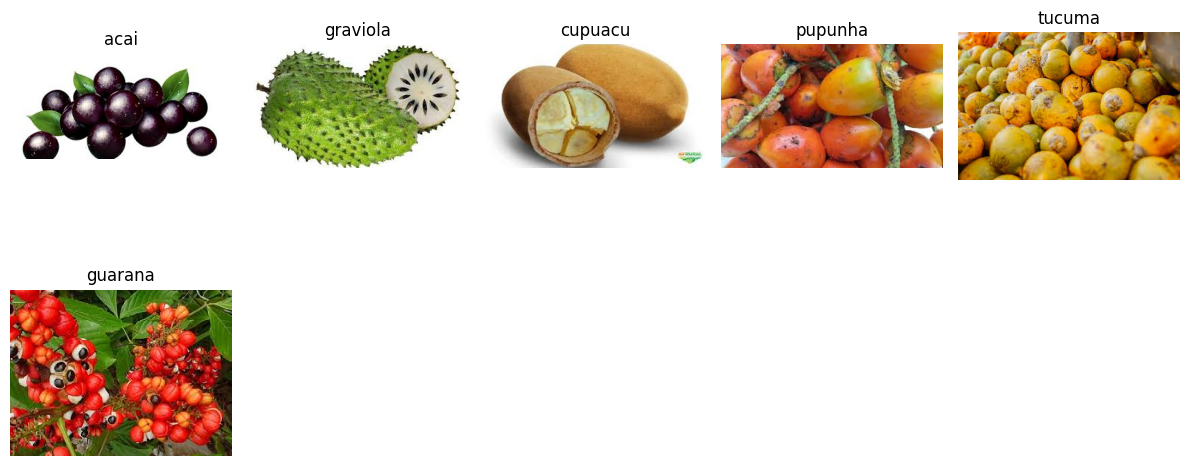

In [4]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Set your dataset path
train_dir = '/content/FruitinAmazon/train'

# Get class names
class_names = os.listdir(train_dir)

# Display random image from each class
plt.figure(figsize=(12, 6))
for i, fruit_class in enumerate(class_names[:10]):  # limit to 10 classes for visual clarity
    class_path = os.path.join(train_dir, fruit_class)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(fruit_class)
    plt.axis('off')
plt.tight_layout()
plt.show()

This code displays a random sample image from each fruit class in the Amazon Fruit dataset. It helps us visually understand the dataset structure and image quality.

Check and Remove Corrupted Images

In [5]:
from PIL import UnidentifiedImageError

corrupted = []

for fruit_class in os.listdir(train_dir):
    class_path = os.path.join(train_dir, fruit_class)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # verifies integrity
        except (UnidentifiedImageError, IOError, SyntaxError):
            print(f"Removed corrupted image: {img_path}")
            corrupted.append(img_path)
            os.remove(img_path)

if not corrupted:
    print("No corrupted images found.")

No corrupted images found.


Task 2: Loading and Preprocessing Image Data

In [6]:
import tensorflow as tf

img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2
rescale = tf.keras.layers.Rescaling(1./255)

# Load training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

#  Extract class names BEFORE mapping
class_names = raw_train_ds.class_names
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)

# Then apply rescaling
train_ds = raw_train_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 72 files for training.
Number of classes: 6
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


Task 3: Build CNN Model

In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Task 4: Compile the Model

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Task 5: Train the Model

In [9]:
# Define validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Apply only rescaling (no augmentation)
rescale = tf.keras.layers.Rescaling(1./255)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.1499 - loss: 1.8982

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 783ms/step - accuracy: 0.1506 - loss: 1.9061 - val_accuracy: 0.1111 - val_loss: 2.3048
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.2541 - loss: 1.8505

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - accuracy: 0.2600 - loss: 1.8353 - val_accuracy: 0.2222 - val_loss: 1.8916
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.3438 - loss: 1.5983

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.3516 - loss: 1.5953 - val_accuracy: 0.1111 - val_loss: 1.8665
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.3976 - loss: 1.4754 - val_accuracy: 0.1111 - val_loss: 1.9739
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.3681 - loss: 1.3388

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.3802 - loss: 1.3294 - val_accuracy: 0.2222 - val_loss: 1.7421
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 0.6181 - loss: 1.1065 - val_accuracy: 0.2222 - val_loss: 1.9899
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.7402 - loss: 0.9114

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 853ms/step - accuracy: 0.7391 - loss: 0.9148 - val_accuracy: 0.3889 - val_loss: 1.5712
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.9115 - loss: 0.6432 - val_accuracy: 0.2778 - val_loss: 1.7808
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 443ms/step - accuracy: 0.8798 - loss: 0.4570 - val_accuracy: 0.5000 - val_loss: 1.7085
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.9601 - loss: 0.2561

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step - accuracy: 0.9596 - loss: 0.2583 - val_accuracy: 0.5556 - val_loss: 1.3433
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.9340 - loss: 0.2673 - val_accuracy: 0.3889 - val_loss: 1.8237
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - accuracy: 0.9783 - loss: 0.1379 - val_accuracy: 0.4444 - val_loss: 2.2035
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - accuracy: 0.9410 - loss: 0.1726 - val_accuracy: 0.2778 - val_loss: 2.0857
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 0.9605 - loss: 0.1024 - val_accuracy: 0.4444 - val_loss: 1.8176
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step - accuracy: 1.0000 - loss: 0.0513 - val_accuracy: 0.5556 - val_loss: 2.7710
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 0.9518 - loss: 0.1793 - val_accuracy: 0.6111 - val_loss: 1.8410
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 1.0000 - loss: 0.0475

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 1.0000 - loss: 0.0470 - val_accuracy: 0.5556 - val_loss: 1.3246
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - accuracy: 1.0000 - loss: 0.0399 - val_accuracy: 0.4444 - val_loss: 1.5002
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 770ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accuracy: 0.5556 - val_loss: 1.5524
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 772ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.5000 - val_loss: 1.8940
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.5000 - val_loss: 2.2313
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.5000 - val_loss: 2.4526
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.4444 - val_loss: 2.5639
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.3333 - val_lo

Task 6: Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5556 - loss: 1.3246
Test Accuracy: 0.5556, Loss: 1.3246


Task 7: Save, Load, and Predict

In [12]:
model.save("fruit_model.h5")
loaded_model = tf.keras.models.load_model("fruit_model.h5")

In [13]:
import numpy as np
from sklearn.metrics import classification_report

# Predict
y_pred_probs = loaded_model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = np.concatenate([y for x, y in val_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00       1.0
     cupuacu       0.00      0.00      0.00       2.0
    graviola       0.00      0.00      0.00       3.0
     guarana       0.00      0.00      0.00       5.0
     pupunha       0.00      0.00      0.00       4.0
      tucuma       0.00      0.00      0.00       3.0

    accuracy                           0.00      18.0
   macro avg       0.00      0.00      0.00      18.0
weighted avg       0.00      0.00      0.00      18.0

